In [77]:
import pandas as pd
import numpy as np

In [78]:
df=pd.read_csv('cars-dataset.csv')

In [79]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [80]:
df.shape

(398, 8)

In [81]:
df.describe(include="all")

,car name,cyl,disp,hp,wt,acc,yr,mpg
count,398,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,94,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,NaN,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,23.514573
std,NaN,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,7.815984
min,NaN,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,9.000000
25%,NaN,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,17.500000
50%,NaN,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,23.000000
75%,NaN,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,29.000000


In [82]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [83]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [84]:
df['hp'] = df.hp.str.replace('?','0').astype(int)

In [85]:
df_missing = df.drop('car name' , axis=1)
nrows , ncols = df_missing.shape
for i in range(0, nrows-1):
    for j in range(0, ncols-1):
        if (df_missing.iloc[i,j] == 0):
            df_missing.iloc[i,j] = np.NaN

In [86]:
from missingpy import KNNImputer  ## imputed the missing values using KNN imputer.
imputer = KNNImputer(n_neighbors=9, weights="uniform" , col_max_missing=1)
df_missing=pd.DataFrame(imputer.fit_transform(df_missing))
df_missing.head()

,0,1,2,3,4,5,6
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


In [87]:
df_missing.columns=['cyl','disp','hp','wt','acc','yr','mpg']

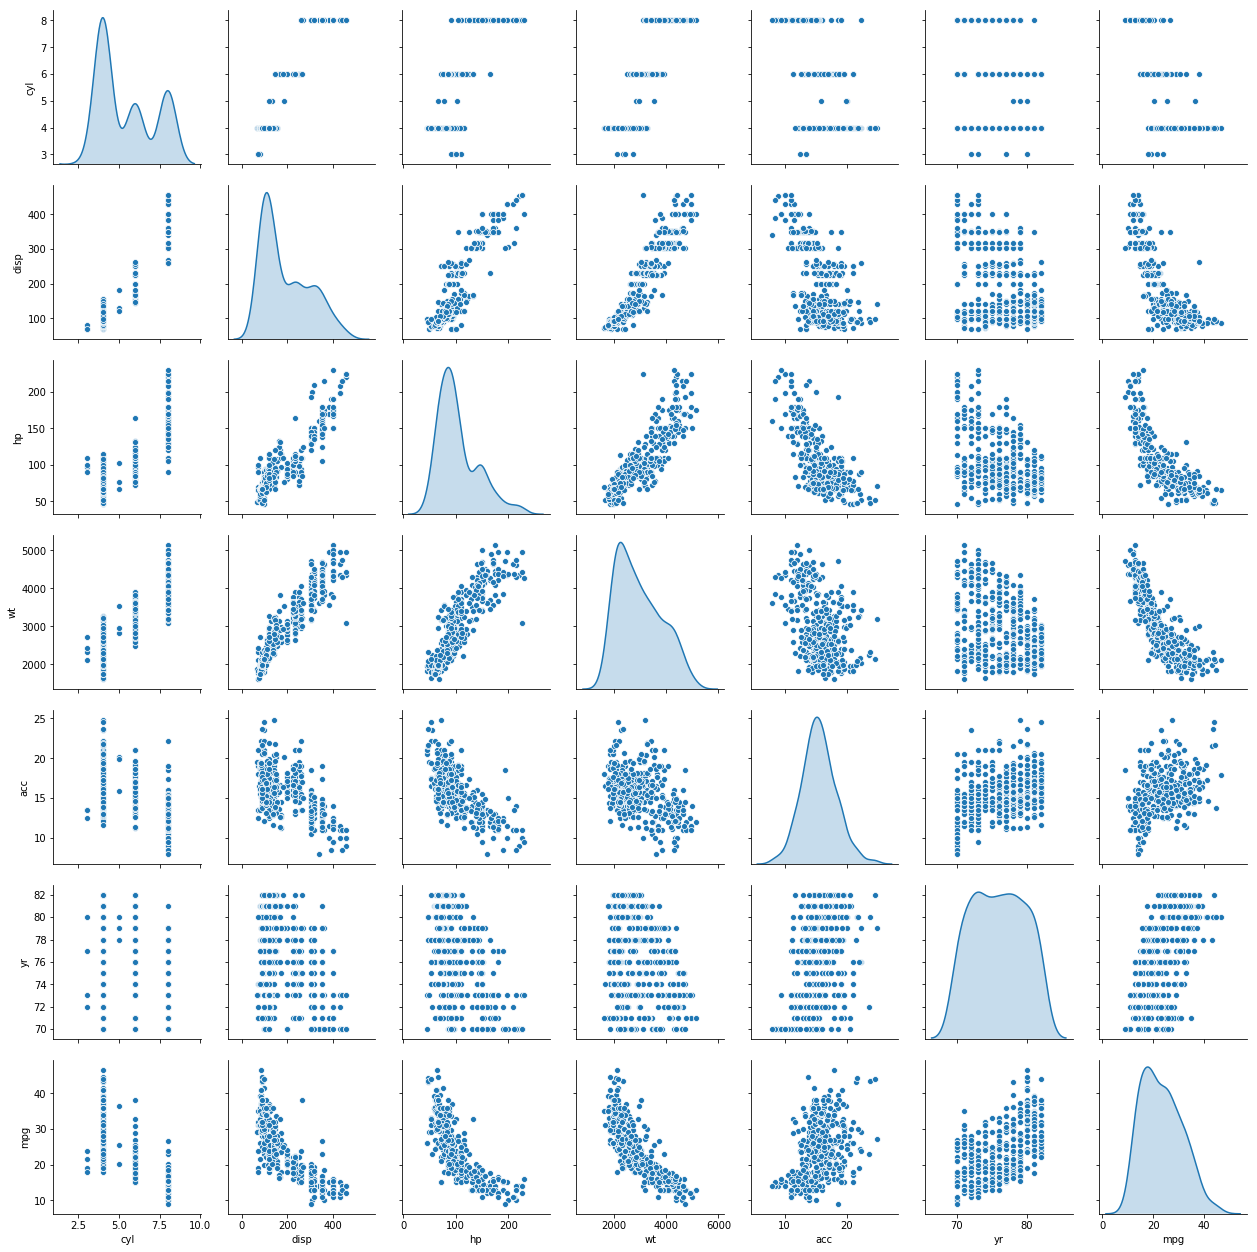

In [88]:
import seaborn as sns
sns.pairplot(df_missing,diag_kind='kde')

# we can see two to three distinct curves and with this we can assume that atleast 2-3 clusters are present.

In [89]:
from scipy.stats import zscore
df2 = df_missing.apply(zscore)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
cluster_range = range(2,7)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 7
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(n_clusters=num_clusters, n_init=10, max_iter=300)
  clusters.fit(df2)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1295.111234
1,3,945.701988
2,4,738.124128
3,5,664.283519
4,6,594.382874


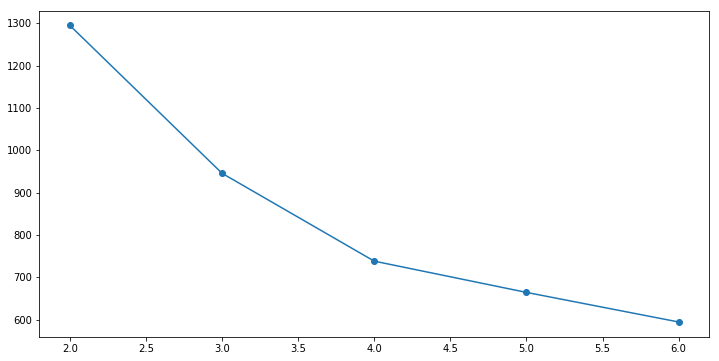

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [92]:
cluster=KMeans(n_clusters=4,n_init=10, max_iter=300)
cluster.fit(df2)
centroids=cluster.cluster_centers_
centroids

array([[ 0.42443037,  0.30530323, -0.03170337,  0.33776539,  0.29367006,
         0.03298635, -0.49682681],
       [ 1.49819126,  1.50392292,  1.52068258,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [-0.82450284, -0.78042723, -0.74436415, -0.76525521,  0.38447752,
         1.12432606,  1.19411648],
       [-0.86209143, -0.80905811, -0.56308564, -0.76253463,  0.32055871,
        -0.61862263,  0.21628669]])

In [93]:
centroid_df = pd.DataFrame(centroids, columns = list(df2))
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,0.424430,0.305303,-0.031703,0.337765,0.293670,0.032986,-0.496827
1,1.498191,1.503923,1.520683,1.404098,-1.086149,-0.688324,-1.163797
2,-0.824503,-0.780427,-0.744364,-0.765255,0.384478,1.124326,1.194116
3,-0.862091,-0.809058,-0.563086,-0.762535,0.320559,-0.618623,0.216287


In [94]:
prediction=cluster.predict(df2)
df2["Group"] = prediction

In [95]:
df_0=df2[df2.Group==0]
df_1=df2[df2.Group==1]
df_2=df2[df2.Group==2]
df_3=df2[df2.Group==3]
df_0.reset_index(drop=True)
df_1.reset_index(drop=True)
df_2.reset_index(drop=True)
df_3.reset_index(drop=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df_0.drop(['mpg','Group'],axis=1)
y=df_0['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
print ("Regression model coefficient for cluster 1:", (regression_model.coef_))
cf0=np.vstack(regression_model.coef_)

0.4325401663554143
0.4703720820852569
Regression model coefficient for cluster 1: [ 0.23622727 -0.14377686 -0.11545637 -0.38548052  0.01244132  0.18763551]


In [96]:
X=df_1.drop(['mpg','Group'],axis=1)
y=df_1['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
print ("Regression model coefficient for cluster 2:", (regression_model.coef_))
cf1=np.vstack(regression_model.coef_)

0.4969920837800168
0.6514587074092213
Regression model coefficient for cluster 2: [-0.46048741 -0.07679325 -0.11146781 -0.06586395 -0.22104491  0.18890364]


In [97]:
X=df_2.drop(['mpg','Group'],axis=1)
y=df_2['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
print ("Regression model coefficient for cluster 3:", (regression_model.coef_))
cf2=np.vstack(regression_model.coef_)

0.5682697587854
0.4950804758410813
Regression model coefficient for cluster 3: [ 0.88660396  0.0545476  -0.61082713 -0.8428627   0.02799714  0.27175503]


In [98]:
X=df_3.drop(['mpg','Group'],axis=1)
y=df_3['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
print ("Regression model coefficient for cluster 4:", (regression_model.coef_))
cf3=np.vstack(regression_model.coef_)

0.6128100321497505
0.555053270375025
Regression model coefficient for cluster 4: [ 0.44007736 -0.41503395 -0.18364702 -0.62283379 -0.07215777  0.13168574]


In [99]:
cf=pd.DataFrame(cf0)
cf['1']=pd.DataFrame(cf1)
cf['2']=pd.DataFrame(cf2)
cf['3']=pd.DataFrame(cf3)
cf.index = list(X)
cf=cf.transpose()

In [100]:
cf  ## Rows are the clusters and columns are the relative coefficient derived from linear regression from each model

,cyl,disp,hp,wt,acc,yr
0,0.236227,-0.143777,-0.115456,-0.385481,0.012441,0.187636
1,-0.460487,-0.076793,-0.111468,-0.065864,-0.221045,0.188904
2,0.886604,0.054548,-0.610827,-0.842863,0.027997,0.271755
3,0.440077,-0.415034,-0.183647,-0.622834,-0.072158,0.131686


In [101]:
centroid_df  ##rows are the clusters and columns are the relative coefficient derived from KMeans method.

,cyl,disp,hp,wt,acc,yr,mpg
0,0.424430,0.305303,-0.031703,0.337765,0.293670,0.032986,-0.496827
1,1.498191,1.503923,1.520683,1.404098,-1.086149,-0.688324,-1.163797
2,-0.824503,-0.780427,-0.744364,-0.765255,0.384478,1.124326,1.194116
3,-0.862091,-0.809058,-0.563086,-0.762535,0.320559,-0.618623,0.216287
